# An overview of SciPy


SciPy is a free and open-source Python library used for scientific computation. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering [Wikipedia](https://en.wikipedia.org/wiki/SciPy). Out of many functionalities, those which are the most relevant to the CBCS course curriculum for Physics will be discussed here. Scipy doumentation can be acessed through [https://docs.scipy.org](https://docs.scipy.org).

## SciPy - Integration


The `scipy.integrate` sub-package provides several integration techniques including an ordinary differential equation integrator. An overview of the module is provided by the help command:

|     |     |
| :--- | :--- |
|`quad`| General purpose integration.|
|`dblquad`| General purpose double integration.|
|`tplquad`| General purpose triple integration.|
|`fixed_quad`| Integrate func(x) using Gaussian quadrature of order n.|
|`quadrature`| Integrate with given tolerance using Gaussian quadrature.|
|`romberg`| Integrate func using Romberg integration.|

### Integrating Functions is a  function object.

#### `quad` - General purpose integration


```
scipy.integrate.quad(func, a, b, args(), ...)
```
[Source]((https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad))

Integrate `func` from `a` to `b` and compute the value of the definite integral.

*   `func`, any Python function,
*   `a` and `b` are lower and upper limit of integration
*   `args()` are list of arguments and it is optional.

Consider the integral
    
\begin{equation}
\int_{0}^{3} \cos^2(e^x)dx
\end{equation}

In [38]:
import numpy as np
from scipy.integrate import quad

func = lambda x: np.cos(np.exp(x))**2  # integrand  
a    = 0                               # lower limit
b    = 3                               # upper limit

result = quad(func, a, b)
print(result)

# result is a tuple whose first element is the value of the integral 
# and the second element is the error

(1.296467785724373, 1.3977971853986262e-09)


The result is a tuple whose first element is the *value* of the integral and the second one is the *error*.

Consider an integral of the form -
\begin{equation}
I(p, q) = \int_{a}^{b}(px + q) dx
\end{equation}
where $p=2$ and $q=1$. Also the limit of integrations are $0$ to $1$.

In [39]:
func = lambda x, p, q: p*x + q

a, b = 0, 1
p, q = 2, 1

result = quad(func, a, b, args=(p, q))
print(result)

(2.0, 2.220446049250313e-14)


#### `dblquad` - General purpose Double Integration

```
scipy.integrate.dblquad(func, a, b, gfun, hfun, args=(), ...)
```
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad)

Integrate the `func(y, x)` from `x = a..b` and `y = gfun(x)..hfun(x)`

Parameters:

-   `func`: a callable Python function of two variables - `y` the first argument and `x` the second.
-   `a`, `b`: the limit of integration in `x`, `a<b`.
-   `gfun`: lower boundary curve in `y` which takes a single argument `x`.
-   `hfun`: upper boundary curve in `y` which takes a single argument `x`.
-   `args`: extra argument to pass to the `func`.

Returns:

- The value of the integral.
- error value.

### Example

Compute the double integral of $\phi(x,y)=xy^2$ over the plane of a square where $x$ extends from 0 to 2 and $y$ from 0 to 1..

In [40]:
from scipy.integrate import dblquad

func = lambda y, x: x*y**2
a, b = 0, 2
gfunc, hfunc = lambda x:0, lambda x: 1

result = dblquad(func, a, b, gfunc, hfunc)
print(result)

(0.6666666666666667, 7.401486830834377e-15)


### Example
Compute the double integral 
\begin{equation}
\int_{0}^{1}\int_{0}^{x}(x^2 + y^2) dA
\end{equation}
where $dA$ indicates small area in $xy$-plane.

In [41]:
from scipy.integrate import dblquad

func = lambda y, x: x**2 + y**2
a, b = 0, 1
gfunc, hfunc = lambda x:0, lambda x: x

result = dblquad(func, a, b, gfunc, hfunc)
print(result)

(0.3333333333333333, 1.4706752548740773e-14)


#### `tplquad` - General purpose Triple Integration

```
scipy.integrate.tplquad(func, a, b, gfun, hfun, qfun, rfun, args=(), ...)
```
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html#scipy.integrate.tplquad)

Return the triple integral of `func(z, y, x)` from `x = a..b`, `y = gfun(x)..hfun(x)`, and `z = qfun(x,y)..rfun(x,y)`.

Parameters:

-   `func`: a callable Python function of at least three variables in the order (z, y, x).
-   `a`, `b`: the limit of integration in `x`, `a<b`.
-   `gfun`: lower boundary curve in `y` which takes a single argument `x`.
-   `hfun`: upper boundary curve in `y` which takes a single argument `x`.
-   `qfun`: The lower boundary surface in z. It must be a function that takes two floats in the order             (x, y). 
-   `rfun`: The upper boundary surface in z. It must be a function that takes two floats in the order             (x, y). 
-   `args`: extra argument to pass to the `func`.

Returns:

- The value of the integral.
- error value.

#### Volume of a unit sphere

Let us attempt to find the volume of a unit sphere. We can solve the problem in cartesian coordinate as well as spherical polar coordinate.

In cartesian coordinate, volume can be expressed interms of triple integral -
\begin{equation}
V = 8\int_{0}^{1}\int_{0}^{\sqrt{1-x^2}}\int_{0}^{\sqrt{1-x^2-y^2}}dzdydx
\end{equation}

In spherical polar coordinate, it is expressed as -
\begin{equation}
V = \int_{0}^{2\pi}\int_{0}^{\pi}\int_{0}^{1}r^2 \sin \theta drd\theta d\phi
\end{equation}

In [42]:
# In cartesian coordinate
from scipy.integrate import tplquad
import numpy as np

func = lambda x, y, z: 1
a, b = 0, 1
gfun, hfun = lambda x: 0, lambda x: np.sqrt(1 - x**2)
qfun, rfun = lambda x, y: 0, lambda x, y: np.sqrt(1 - x**2 - y**2)

result, error = tplquad(func, a, b, gfun, hfun, qfun, rfun)
print("Volume of the sphere = %0.3f"%(result*8))

Volume of the sphere = 4.189


In [43]:
# In spherical polar coordinate
from scipy.integrate import tplquad
import numpy as np

func = lambda phi, theta, r: r**2*np.sin(theta)
a, b = 0, 1
gfun, hfun = lambda theta: 0, lambda theta: np.pi
qfun, rfun = lambda theta, phi: 0, lambda theta, phi: 2*np.pi

result, error = tplquad(func, a, b, gfun, hfun, qfun, rfun)
print("Volume of the sphere = %0.3f"%(result))

Volume of the sphere = 4.189


Evaluate
\begin{equation}
\int_{1}^{2}\int_{2}^{3}\int_{0}^{1}xyzdxdydz
\end{equation}

In [44]:
from scipy.integrate import tplquad

func = lambda x, y, z: x*y*z
a, b = 1, 2
gfun, hfun = lambda x: 2, lambda x: 3
qfun, rfun = lambda x, y: 0, lambda x, y: 1

result = tplquad(func, a, b, gfun, hfun, qfun, rfun)
print(result)

(1.8750000000000002, 3.324644794257407e-14)


Evaluate
\begin{equation}
\int\int\int x^2yz dxdydz
\end{equation}
throughout the volume bounded by the plane $x=0$, $y=0$ and $z=0$, $x+y+z=1$.

In [45]:
from scipy.integrate import tplquad

func = lambda x, y, z: x**2*y*z
a, b = 0, 1
gfun, hfun = lambda x: 0, lambda x: 1 - x
qfun, rfun = lambda x, y: 0, lambda x, y: 1 - x - y

result = tplquad(func, a, b, gfun, hfun, qfun, rfun)
print(result)

(0.0003968253968253968, 3.14561023818924e-17)


Let $\phi=45x^2y$ and let $V$ denote the closed region bounded by the planes $4x + 2y + z= 8$, $x=0$, $y=0$ and $z=0$. Evaluate the integral $\int\int\int \phi dV$.

In [46]:
from scipy.integrate import tplquad

func = lambda x, y, z: 45*x**2*y
a, b = 0, 2
gfun, hfun = lambda x: 0, lambda x: (4 - 2*x)
qfun, rfun = lambda x, y: 0, lambda x, y: (8 - 4*x - 2*y)

result = tplquad(func, a, b, gfun, hfun, qfun, rfun)
print(result[0])
# answer is not correct

2048.0


Find the volume of the region common to the intersecting cylinders $x^2 + y^2 = a^2$ and $x^2 + z^2 = a^2$.

Let us take the radius of each cylinder to be equal to 1.

In [47]:
from scipy.integrate import tplquad
import numpy as np


func = lambda x, y, z: 1
a, b = 0, 1
gfun, hfun = lambda x: 0, lambda x: np.sqrt(1 - x**2)
qfun, rfun = lambda x, y: 0, lambda x, y: np.sqrt(1 - x**2)

result = tplquad(func, a, b, gfun, hfun, qfun, rfun)
print("Required volume =%0.3f "%(result[0]*8))

Required volume =5.333 


## Gaussian Quadrature

*   The first one is `fixed_quad`, which performs fixed-order Gaussian quadrature. 
*   The second one is `quadrature`, which performs Gaussian quadrature of multiple orders until the difference in the integral estimate is beneath some tolerance supplied by the user. 

### `fixed_quad` - Gaussian quadrature

```
scipy.integrate.fixed_quad(func, a, b, args=(), n=5)
```
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.fixed_quad.html#scipy.integrate.fixed_quad)

Compute a definite integral using fixed-order Gaussian quadrature.

Integrate func from `a` to `b` using Gaussian quadrature of order `n`.


Parameters:

-   `func`: a callable Python function.
-   `a`   : `float`, the lower limit of integration.
-   `b`   : `float`, the upper limit of integration.
-   `args`: `tuple()`, extra argument to pass to the `func`.
-   `n`   : `int`, order of quadrature integration, default is 5.

Returns:

- The Gaussian quadrature approximation to the integral.
- Statically returned value of None.

In [48]:
from scipy.integrate import fixed_quad
f = lambda x: x**8
fixed_quad(f, 0.0, 1.0, n=4)

(0.1110884353741496, None)

In [49]:
import numpy as np

f = lambda x: np.cos(x)
a = 0
b = np.pi/2
fixed_quad(f, a, b, n=4)

(0.9999999771971152, None)

In [50]:
f = lambda x: 1/(x**2 + 2)

fixed_quad(f, 0, 1)

(0.4352098672079321, None)

### `quadrature` - Gaussian quadrature

```
scipy.integrate.quadrature(func, a, b, args=(), tol=1.49e-08, ...)
```
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

Compute a definite integral using fixed-tolerance Gaussian quadrature.

Integrate func from `a` to `b` using Gaussian quadrature with absolute tolerance `tol`.


Parameters:

-   `func`: a callable Python function.
-   `a`   : `float`, the lower limit of integration.
-   `b`   : `float`, the upper limit of integration.
-   `args`: `tuple()`, extra argument to pass to the `func`.
-    `tol`, `rtol`: optional
Iteration stops when error between last two iterates is less than *tol* OR the relative change is less than *rtol*.
Returns:

- `float`, Gaussian quadrature approximation (within tolerance) to integral.The Gaussian quadrature approximation to the integral.
- `float`, Difference between last two estimates of the integral.

In [51]:
from scipy.integrate import quadrature
f = lambda x: x**8
quadrature(f, 0.0, 1.0)

(0.11111111111111106, 4.163336342344337e-17)

In [52]:
import numpy as np

f = lambda x: np.cos(x)
a = 0
b = np.pi/2
quadrature(f, a, b)

(0.9999999999999536, 3.9611425250996035e-11)

In [53]:
f = lambda x: 1/(x**2 + 2)

quadrature(f, 0, 1)

(0.4352098758040617, 8.596129585924928e-09)

## Integration using sample

### `trapezoid`- Trapezoidal rule

```
scipy.integrate.trapezoid(y, x=None, dx=1.0, axis=- 1)
```

Integrate along the given axis using the composite trapezoidal rule.

Parameters:

Integrate y (x) along given axis.

*   `y`: array_like

         Input array to integrate.

*   `x`: array_like, optional

         The sample points corresponding to the y values. If x is None, the sample points are 
         assumed to be evenly spaced dx apart. The default is None.

*   `dx`: scalar, optional

        The spacing between sample points when x is None. The default is 1.

*   `axis`: int, optional

          The axis along which to integrate.

Returns:

*    `trapz`: float

           Definite integral as approximated by trapezoidal rule.

In [54]:
np.trapz([1,2,3])

4.0

In [55]:
np.trapz([1,2,3], x=[4,6,8])

8.0

In [56]:
np.trapz([1,2,3], dx=2)

8.0

In [57]:
a = np.arange(6).reshape(2, 3); a

array([[0, 1, 2],
       [3, 4, 5]])

In [58]:
np.trapz(a, axis=0)

array([1.5, 2.5, 3.5])

In [59]:
np.trapz(a, axis=1)

array([2., 8.])

### `simpson` - Simpson rule
```
scipy.integrate.simpson(y, x=None, dx=1, axis=- 1, even='avg')
```

Integrate y(x) using samples along the given axis and the composite Simpson’s rule. If x is None, spacing of dx is assumed.

If there are an even number of samples, N, then there are an odd number of intervals (N-1), but Simpson’s rule requires an even number of intervals. The parameter ‘even’ controls how this is handled.

**Parameters**

*    y: array_like
        Array to be integrated.

*    x: array_like, optional
        If given, the points at which y is sampled.

*    dx: int, optional
        Spacing of integration points along axis of x. Only used when x is None. Default is 1.

*    axis: int, optional
        Axis along which to integrate. Default is the last axis.

In [60]:
from scipy import integrate

x = np.arange(0, 10)
y = np.arange(0, 10)

integrate.simpson(y, x)

40.5

In [61]:
y = np.power(x, 3)
integrate.simpson(y, x)

1642.5

In [62]:
integrate.quad(lambda x: x**3, 0, 9)[0]

1640.25

In [63]:
integrate.simpson(y, x, even='first')

1644.5

## Solving Ordinary Differential Equation

### scipy.integrate.odeint

```
scipy.integrate.odeint(func, y0, t, args=(), ...)
```

Integrate a system of ordinary differential equations.

|     |    
|:--- |
|**Parameters**|
|`func`: **callable(y, t)**|
|`y0`: **array** - Initial condition on y (can be a vector).|
|`t`: **array** - A sequence of time points for which to solve for y.|
|`args`: **tuple, optional** - Extra arguments to pass to function.|

|   |  
|:--- |
|**Returns**|
|`y`: **array**, `shape (len(t), len(y0))`|
Array containing the value of `y` for each desired time in `t`, with the initial value `y0` in the first row.


#### Example - Oscillation of a pendulum

The differential equation representing the motion of a simple pendulum under action of gravity and inpresence of air resistance is given by
\begin{equation}
\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} + c\theta = 0
\end{equation}
where $b$ and $c$ are arbitrary constants.

Since, `odeint` solver can solve first order differntial equation, we have to break the given equation into two first order equations -

\begin{align}
&\frac{d\theta}{dt} = \omega \\
&\frac{d\omega}{dt} = - b\omega - c\theta
\end{align}

To solve these coupled differential equations, we can consider a vector $y$ which holds two variables $\theta$ and $\omega$, i.e.

$$y = [\theta, \omega]$$

So, we can make a model which is essential for estimating slope at different points in the time $t$ domain for solving the differential equations.

In [64]:
def model(y, t, b, c):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -b*omega - c*theta
    dy_dt     = [dtheta_dt, domega_dt]
    return dy_dt

Let us now set the initial conditions of the system. Consider, the pendulum is nearly at vertical position and the pendulum makes a very small angle, say $1^\circ$ with vertical and initial velocity be 0. So, we can write the initial condition as

In [65]:
import numpy as np

y0 = [np.radians(1), 0]

Let us discretize the time domain into 100 points and calculate $y$ values at each point.

In [66]:
t = np.linspace(0, 10, 100)

We have to pass the values of the constants $b$ and $c$ to the `odeint` function through `args=((b, c),)`. Let us take $b = 0.25, ~ c=5.0$ and assign the values to the variables.

In [67]:
b, c = 0.25, 5.0

from scipy.integrate import odeint

y = odeint(model, y0, t, args=(b, c))
theta, omega = y[:, 0], y[:, 1]

The solution is an array with shape (101, 2). The first column is $\theta(t)$, and the second is $\omega(t)$. The following code plots both components.

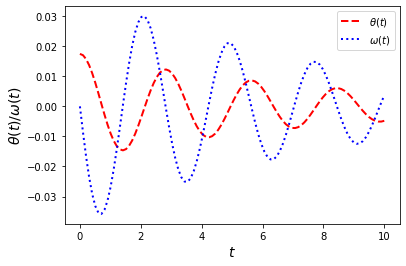

In [68]:
import matplotlib.pyplot as plt

plt.plot(t, theta, lw=2, linestyle='--', color='red', label="$\\theta(t)$")
plt.plot(t, omega, lw=2, linestyle=':', color='blue', label="$\omega(t)$")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$\\theta(t) / \\omega(t)$", fontsize=14)
plt.legend(loc="best")
plt.show()

#### scipy.integrate.solve_ivp

```
scipy.integrate.solve_ivp(fun, t_span, y0, t_eval=None, args = none, ...)
```

Solve an initial value problem for a system of ODEs.

The function numerically integrates an ordinary differential equation with a given initial value.

\begin{equation}
\frac{dy}{dt} = f(t, y)\\
y(t_0) = y_0
\end{equation}

|     |    
|:--- |
|**Parameters**|
|`func`: **callable(y, t)** - The calling signature is `fun(t, y)`|
|`t_span`: **2-tuple of floats** - Interval of integration (t0, tf). The solver starts with t=t0 and integrates until it reaches t=tf.|
|`y0`: **array_like, shape (n,)** - Initial state.|
|`t_eval`: **array_like or None, optional** - Times at which to store the computed solution, must be sorted and lie within t_span. If None (default), use points selected by the solver.|
|`args`: **tuple, optional** - 
Additional arguments to pass to the user-defined functions. If given, the additional arguments are passed to all user-defined functions. So if, for example, fun has the signature fun(t, y, a, b, c),|

|   |  
|:--- |
|**Returns**|
|`t`: **ndarray, shape (n_points,)** - Time points.|
|`y`: **ndarray, shape (n, n_points)** - Values of the solution at t.|
|`sol`: **OdeSolution or None** - Found solution as OdeSolution instance; None if dense_output was set to False.|
|`t_events`: **list of ndarray or None** - Contains for each event type a list of arrays at which an event of that type event was detected. None if events was None.|
|`y_events`: **list of ndarray or None** - For each value of t_events, the corresponding value of the solution. None if events was None.|

#### Example - Radioactive Decay

Radioactivity is the phenomenon where an atomic nucleus spontaneously decay to other nucleus without the aid of any external agent and the process continues until it reaches a stable atomic configuration. 

The rate of decay of a radioactive nucleus at any instant is proportional to the number of nuclei present in the sample at that time, i.e.

\begin{equation}
\frac{dN(t)}{dt} = \lambda t
\end{equation}

where $N(t)$ represents the number of radioactive nucleus at time $t$ and $\lambda$ is the decay constant, which is related to the half-life (i.e. the time during which half of the sample is decayed) of the sample.

If $N(t_0) = N_0$ represents the initial number of radioactive nucleus present in the sample, then, we can treat it as an initial value problem and solve with the help of `solve_ivp` solver from SciPy .

So, first of all let us frame our decay model, which should be

In [69]:
def model_decay(t, N):
    return -lamda*N

The initial condition is that at the begining i.e. when start studying the system, the numebr of nuclei at the sample be 10000. So, we can write $N(0) = 10000$.

Let us discretize our time domain into 1000 points and start calculating the value of $N$ at each time point. This can be done in this way.

In [70]:
t_init, t_final = 0, 1000
t = np.arange(t_init, t_final, 100)
N0 = [10000]
lamda = 0.005

Now, we arrange the problem definitions according to our `solve_ivp` solver.

In [71]:
func = model_decay
t_span = [t_init, t_final]
y0 = N0
t_eval = t

In [72]:
from scipy.integrate import solve_ivp

sol = solve_ivp(model_decay, t_span=[t_init, t_final], y0=N0, t_eval = t)

t = sol.t
N = sol.y.T

The solution can be represented graphivally with the following code.

In [73]:
def analytical_model(t):
    return N0*np.exp(-lamda*t)

N_analytical = analytical_model(t)

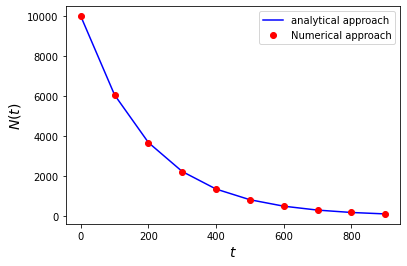

In [74]:
plt.plot(t, N, 'b-', label='analytical approach')
plt.plot(t, N, 'ro', label='Numerical approach')
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$N(t)$", fontsize=14)
plt.legend()
plt.show()